# MATH70094 Programming for Data Science Assessment 3/2024 Question 1

## CID - 01349943 - Thomas Richardson


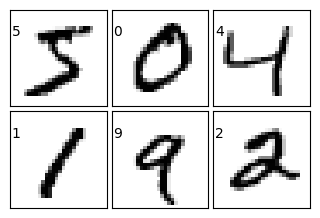

In [10]:
# Do not alter this

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

# load the mnist data, split into data (images) X and labels Y
mnist = pd.read_csv('mnist.csv')
Y = np.array(mnist["digit"])
X = np.array(mnist.drop("digit", axis=1).copy())

def visualise(images, labels = None):
    """Prints on a grid images and their labels (if given).

    Args:
        images: matrix with image samples as rows
        labels: label for each image
    """
    n = math.ceil(math.sqrt(images.shape[0]))
    fig = plt.figure(figsize=(n,n))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for idx, row in enumerate(images):
        ax = fig.add_subplot(n, n, idx + 1, xticks=[], yticks=[])
        im = row.reshape((28,28))
        ax.imshow(im, cmap=plt.cm.binary)
        # label the image with the target value
        if labels is not None:
            ax.text(0, 7, str(labels[idx]))

# test the visualise method
visualise(X[:6],Y[:6])

# Do not alter this

## Part A

### A(i)

In [13]:
class Eigendigits():

  def __init__(self, n_pcs):
        """Constructs an Eigendigits object.

        Args:
            n_pcs: number of principal components
        """
        self.n_pcs = n_pcs # scalar
        self.mean = None # p vector
        self.explained_variance_ratio = None # scalar
        self.components = None # n_pcs x p matrix

  def ___str___(self):
      """ Prints the string representation of the eigen object"""
      return (f"Eigendigits object\n"
                f"Number of principal components: {self.n_pcs}\n"
                f"Explained variance ratio: {self.explained_variance_ratio if self.explained_variance_ratio is not None else 'N/A'}")

  def fit(self, X):
      """
      Takes X and calculates the mean, principal components and explained variance ratio

      Args:
      X: Input is a data matrix of shape (n_samples, p_features)

      Notes:
      This can't modify X

      """
      # Compute the mean and center the data
      self.mean = np.mean(X, axis=0)
      X_centered = X.copy() - self.mean

      # Compute the covariance matrix
      cov_matrix = np.dot(X_centered.T, X_centered) / (X.shape[0] - 1)

      # Calculate the eigenvalues and eigenvectors of the covariance matrix
      eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

      # Sort the eigenvalues and eigenvectors in descending order
      sorted_indices = np.argsort(eigenvalues)[::-1]
      eigenvalues = eigenvalues[sorted_indices]
      eigenvectors = eigenvectors[:, sorted_indices]

      # Select the top n_pcs eigenvectors
      self.components = eigenvectors[:, :self.n_pcs]

      # Compute explained variance ration
      total_variance = np.sum(eigenvalues) # Total variance in the data
      explained_variance = np.sum(eigenvalues[:self.n_pcs]) # Total Variance by top few n_pcs
      self.explained_variance_ratio = explained_variance / total_variance

  def scores(self, Z):
      """
      Projecting Z onto the principal components

      Args:
      Z: Input is a data matrix of shapre (m,p) where row corresponds to an image

      Returns:
      scores: A matrix of shape (m, n_pcs) where each row is the score of each of the principal components
      """

      # First checking the Eigenditis object has been fitted properly
      if self.mean is None or self.components is None:
        raise ValueError("The Eigendigits object has not been fitted properly")

      # Centering the input data
      Z_centered = Z - self.mean

      # Project the centered data onto the principal components
      scores = np.dot(Z_centered, self.components)

      return scores

  def project(self, Z):
      """
      Projects Z onto the principal components

      Args:
      Z: Input is a data matrix of shapre (m,p) where row corresponds to an image

      Returns:
      reconstructed: A matrix of shape (m, p) where each row is the projection
      of the corresponding image onto the principal components

      """
      # First checking the Eigenditis object has been fitted properly
      if self.mean is None or self.components is None:
        raise ValueError("The Eigendigits object has not been fitted properly")

      # Compute the scores
      scores = self.scores(Z)

      # Move around the data
      projections = np.dot(scores, self.components.T) + self.mean

      return projections

  def classify(self, X_train, Y_train, x_test):
      """
      Classifies x_test using PCA of the training data X_train and Y_train

      Args:
        X_train: Training data matrix of shape (n, p)
        Y_train: Training labels of shape (n)
        x_test: Test data matrix of shape (m, p)

      Returns:
        y_pred: The predicted labels of shape (m)
      """
      if self.mean is not None and self.components is not None:

        # Ftting PCA using the training data
        self.fit(X_train)

        # Projecting training data into PCA space
        training_scores = self.scores(X_train)

        # Projecting the test sample into PCA space
        test_scores = self.scores(x_test.reshape(1, -1))

        # Compute distances between x_test and all training samples in PCA space
        distances = np.linalg.norm(training_scores - test_scores, axis=1)

        # Attaching the label of the closest neighbour
        neighbour_index = np.argmin(distances) # Index of the closest neighbour
        y_pred = Y_train[neighbour_index] # Our result

        return y_pred

## Part B - Tests

In [12]:
# Do not alter this

# create generic example that can be used in the tests below
np.random.seed(1)
def create_example(n_pcs):
    X = np.random.randint(low=0, high=256, size=(100,784))
    Z = np.random.randint(low=0, high=256, size=(5,784))
    eds = Eigendigits(n_pcs)
    eds.fit(X)
    return eds, Z

n_pcs = 10
eds, Z = create_example(n_pcs)

# Do not alter this

In [16]:
# tests go here

import unittest
import numpy as np

class TestEigendigits(unittest.TestCase):
  def test_components_shape(self):

    """
    Part a) Test if the shape of the components is (n_pcs, 784)

    """
    np.random.seed(1) # Taking a certain random number
    n_pcs = 10 # Number of principal components
    eds, Z = create_example(n_pcs) # Create an example of Eigendigits instance

    self.assertEqual(eds.components.shape, (n_pcs, 784), "The shape of the components is not correct")

  def test_scores_output_shape(self):
    """
    Part b) Test if the shape of the scores is (m, n_pcs)

    """

    np.random.seed(1) # Taking a certain random number
    n_pcs = 10 # Number of principal components
    eds, Z = create_example(n_pcs) # Create an example of Eigendigits instance

    self.assrtIsNotNone(eds.components, "Eigendigits object is not fitted")

    # Getting the output scores matrix
    scores = eds.scores(Z)

    # Using asserEqual to check if they are equal
    self.assertEqual(scores.shape, (Z.shape[0], n_pcs), "The shape of the scores is not correct")

  def test_project_output_shape(self):
    """
    Part c) Test if projected matrix shape is (m, p)

    """

    np.random.seed(1) # Taking a certain random number
    n_pcs = 10 # Number of principal components
    eds, Z = create_example(n_pcs) # Create an example of Eigendigits instance

    self.assrtIsNotNone(eds.components, "Eigendigits object is not fitted")

    # Getting the projected matrix
    projected_matrix = eds.project(Z)

    # Checking the shape of the project matrix
    expected_shape = Z.shape
    self.assertEqual(projected_matrix.shape, expected_shape, f"The projected matrix is {projected_matrix.shape} and this not equal to not equal the expected shape {expected_shape}")

  def test_project_reconstructs_input(self):
    """
    Part d) Test if the reconstructed matrix is equal to the input matrix when using all principal components

    """
    np.random.seed(1) # Taking a certain random number
    n_pcs = 784 # Setting n_pcs = p (the number of features in Z)
    eds, Z = create_example(n_pcs)

    self.assrtIsNotNone(eds.components, "Eigendigits object is not fitted")

    # Getting the projected matrix
    projected_matrix = eds.project(Z)

    # Checking that it returns the same matrix using np.allclose with tollerance 1e-6
    self.aseertTrue(np.allclose(projected_matrix, Z, atol = 1e-6), "Projected matrix does not closely match the original input when using all principal components.")

  def test_explained_variance_increase(self):
    """
    Part e) Test if the explained variance ratio increases with more principal components

    """
    n_pcs_list = [5, 10, 20, 50, 100]
    explained_variance_ratios = []

    for n_pcs in n_pcs_list:
      example = create_example(n_pcs)
      explained_variance_ratios.append(example['eds'].explained_variance_ratio[-1])

      # Check that the explained variance ratio increase as we add more components
      self.assertTrue(np.all(np.diff(explained_variance_ratios) > 0),
                      "The explained variance ratio does not increase as we add more components.")

    # Running the test
    if __name__ == '__main__':
      unittest.main(argv=[''], exit=False)

## Part C - Implementation

### C(i)

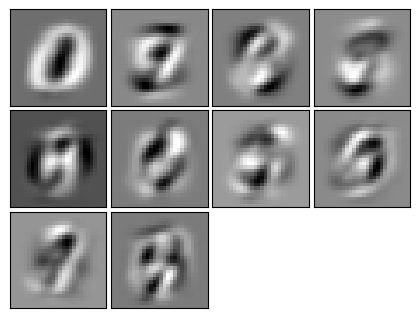

In [17]:
# code goes here

# Load the MNIST dataset
mnist = pd.read_csv('mnist.csv')
Y = np.array(mnist["digit"])  # Labels
X = np.array(mnist.drop("digit", axis=1))  # Images

# Create Eigendigits object with 10 principal components
eigendigits = Eigendigits(n_pcs=10)
eigendigits.fit(X)  # Fit to the data

# Print the Eigendigits object
print(eigendigits)

# Visualize the first 10 principal components
visualise(eigendigits.components.T[:10])  # Transpose components to get rows


### C(ii)

Number of Principal Components: 1
Accuracy: 1/9
Original test images with true labels:
Projected test images with predicted labels:
Number of Principal Components: 2
Accuracy: 6/9
Original test images with true labels:
Projected test images with predicted labels:
Number of Principal Components: 3
Accuracy: 4/9
Original test images with true labels:
Projected test images with predicted labels:
Number of Principal Components: 4
Accuracy: 5/9
Original test images with true labels:
Projected test images with predicted labels:
Number of Principal Components: 5
Accuracy: 6/9
Original test images with true labels:
Projected test images with predicted labels:
Number of Principal Components: 6
Accuracy: 8/9
Original test images with true labels:
Projected test images with predicted labels:
Number of Principal Components: 7
Accuracy: 8/9
Original test images with true labels:
Projected test images with predicted labels:
Number of Principal Components: 8
Accuracy: 8/9
Original test images with tr

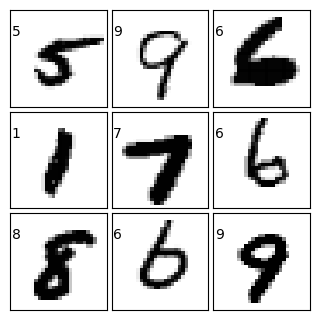

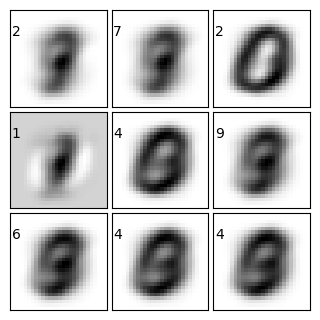

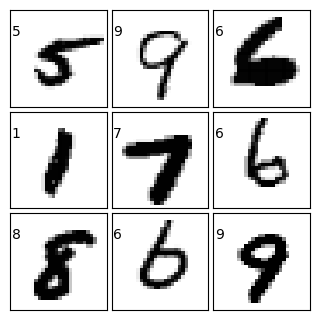

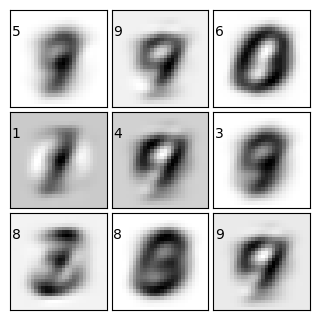

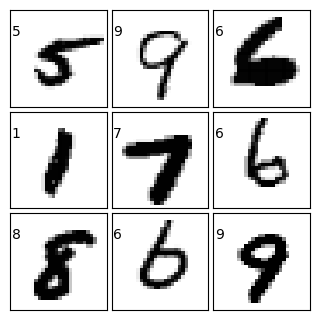

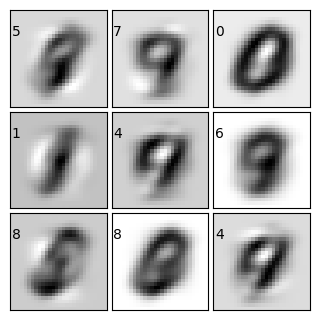

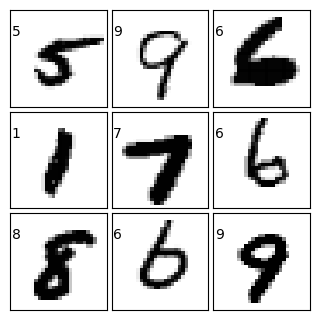

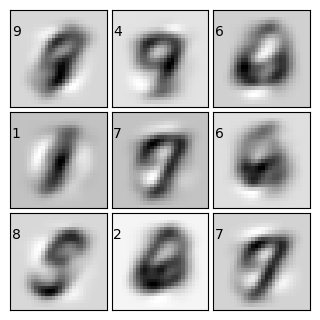

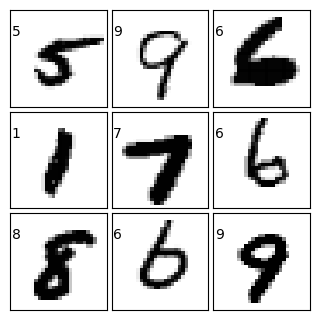

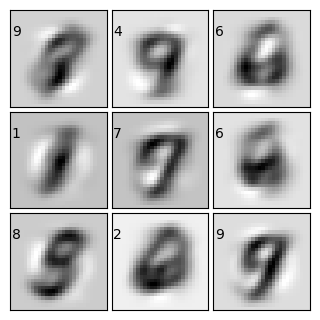

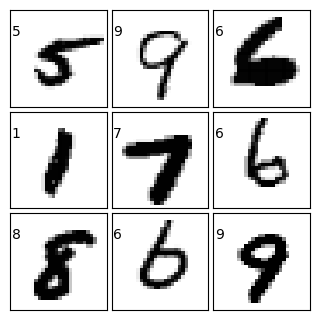

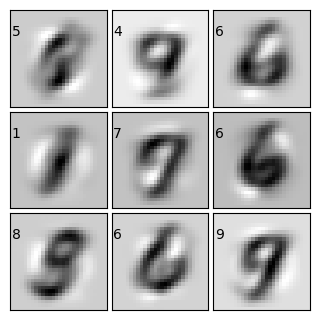

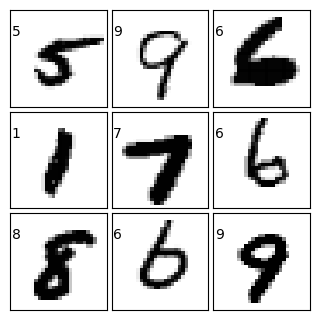

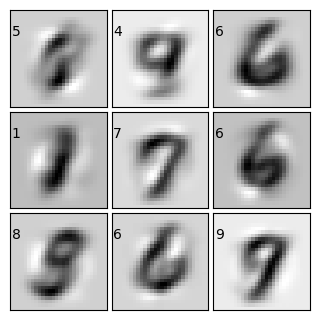

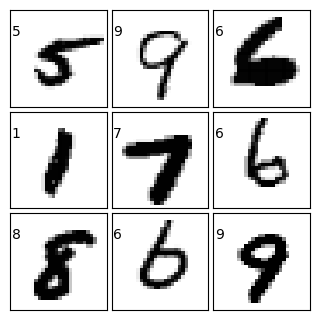

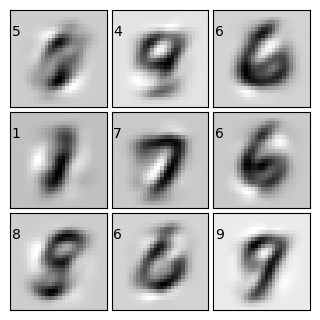

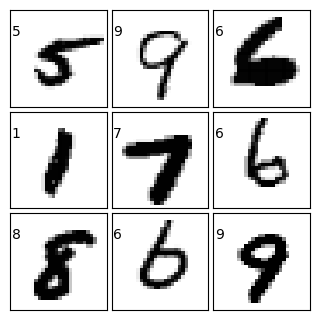

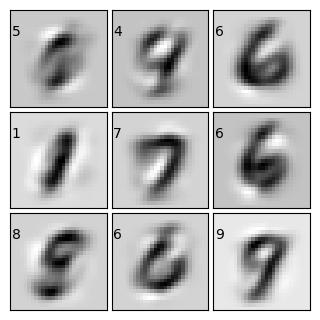

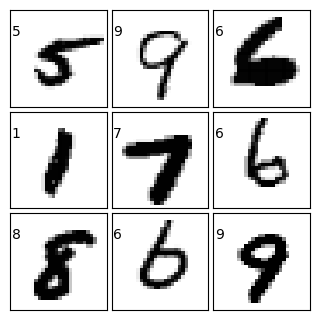

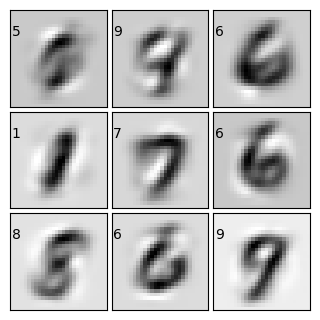

In [18]:
# code goes here

# Load the MNIST dataset
mnist = pd.read_csv('mnist.csv')
Y = np.array(mnist["digit"])  # Labels
X = np.array(mnist.drop("digit", axis=1))  # Images

# Split into training and test sets
X_train = X[:-9]
X_test = X[-9:]
Y_train = Y[:-9]
Y_test = Y[-9:]

# Function to test different numbers of principal components
def classify_with_pcs(n_pcs, X_train, Y_train, X_test, Y_test):
    # Create and fit the Eigendigits object
    eigendigits = Eigendigits(n_pcs=n_pcs)
    eigendigits.fit(X_train)

    # Classify each test image
    predictions = [eigendigits.classify(X_train, Y_train, x_test) for x_test in X_test]

    # Check accuracy
    correct_count = sum([pred == true for pred, true in zip(predictions, Y_test)])

    # Visualize true labels
    print(f"Number of Principal Components: {n_pcs}")
    print(f"Accuracy: {correct_count}/{len(Y_test)}")

     # Visualize original test images with true labels
    print("Original test images with true labels:")
    visualise(X_test, Y_test)

    # Visualize projections with predicted labels
    projections = eigendigits.project(X_test)
    print("Projected test images with predicted labels:")
    visualise(projections, predictions)

    return correct_count == len(Y_test)  # Return True if all are correctly classified

# Iterate over different numbers of principal components
for n_pcs in range(1, X_train.shape[1] + 1):
    if classify_with_pcs(n_pcs, X_train, Y_train, X_test, Y_test):
        print(f"All test images correctly classified with {n_pcs} principal components.")
        break  # Stop after the first successful classification


In [ ]:
# Therefore, we need 10 principal components to correctly classify the last 9 images

In [ ]:
%%shell
jupyter nbconvert --to html /content/PDS_A3_Q1.ipynb

[NbConvertApp] Converting notebook /content/PDS_A3_Q1.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 313258 bytes to /content/PDS_A3_Q1.html
